<a href="https://colab.research.google.com/github/04-purnima/Cardiovascular_Risk_Prediction./blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Let us begin with importing the libraries
import pandas as pd # linear algebra
import numpy as np # data processing
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path ='/content/drive/MyDrive/Almabetter Notebooks/MachineLearning(Classification)/data_cardiovascular_risk.csv'
cardiovascular=pd.read_csv(file_path)


In [ ]:
print(f"The shape of cardiovascular{cardiovascular.shape}")

The shape of cardiovascular(3390, 17)


In [ ]:
print(cardiovascular.columns)

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [ ]:
rows = cardiovascular.shape[0]
column = cardiovascular.shape[1]
print(f'There are {rows} Rows and {column} Columns in the Cardiovascular DataFrame')

There are 3390 Rows and 17 Columns in the Cardiovascular DataFrame


In [ ]:
cardiovascular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# Lets us print the first and last 10 rows of information of the dataframe.

concat_CV = pd.concat([cardiovascular.head(10),cardiovascular.tail(10)])
concat_CV

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [ ]:
def CVinfo():
    temp = pd.DataFrame(index=cardiovascular.columns)
    temp['data_type'] = cardiovascular.dtypes
    temp["count of non null values"] = cardiovascular.count()
    temp['NaN values'] = cardiovascular.isnull().sum()
    temp['% NaN values'] = (temp['NaN values']/len(cardiovascular)).round(4)*100 # or cardiovascular.isnull().mean()
    temp['unique_count'] = cardiovascular.nunique()
    return temp 
CVinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
id,int64,3390,0,0.00,3390
age,int64,3390,0,0.00,39
education,float64,3303,87,2.57,4
sex,object,3390,0,0.00,2
is_smoking,object,3390,0,0.00,2
cigsPerDay,float64,3368,22,0.65,32
BPMeds,float64,3346,44,1.30,2
prevalentStroke,int64,3390,0,0.00,2
prevalentHyp,int64,3390,0,0.00,2
diabetes,int64,3390,0,0.00,2


In [ ]:
cardiovascular.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Statistic Overview
cardiovascular.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


# Plotting features, correlations & more

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

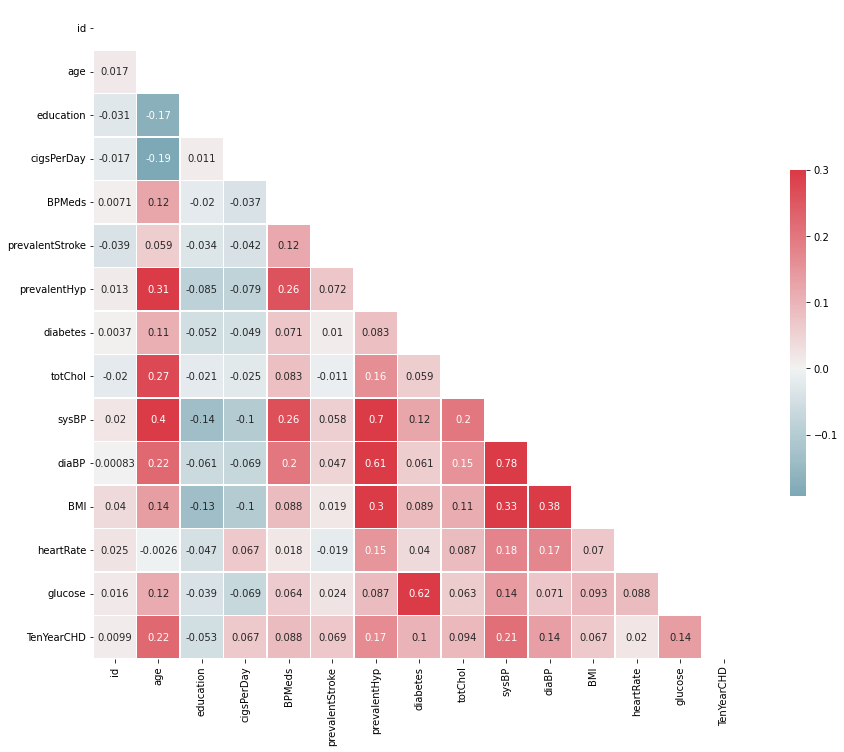

In [ ]:
# Multivariate Analysis & Correlation Detection
import seaborn as sb
correl = cardiovascular.corr()
cmap = sb.diverging_palette(220, 10, as_cmap = True)

mask = np.zeros_like(correl, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (16, 12))

sb.heatmap(correl, mask = mask, cmap = cmap, vmax = 0.3, center = 0,annot = True, square = True, linewidths = 0.5, cbar_kws = {"shrink": .5});

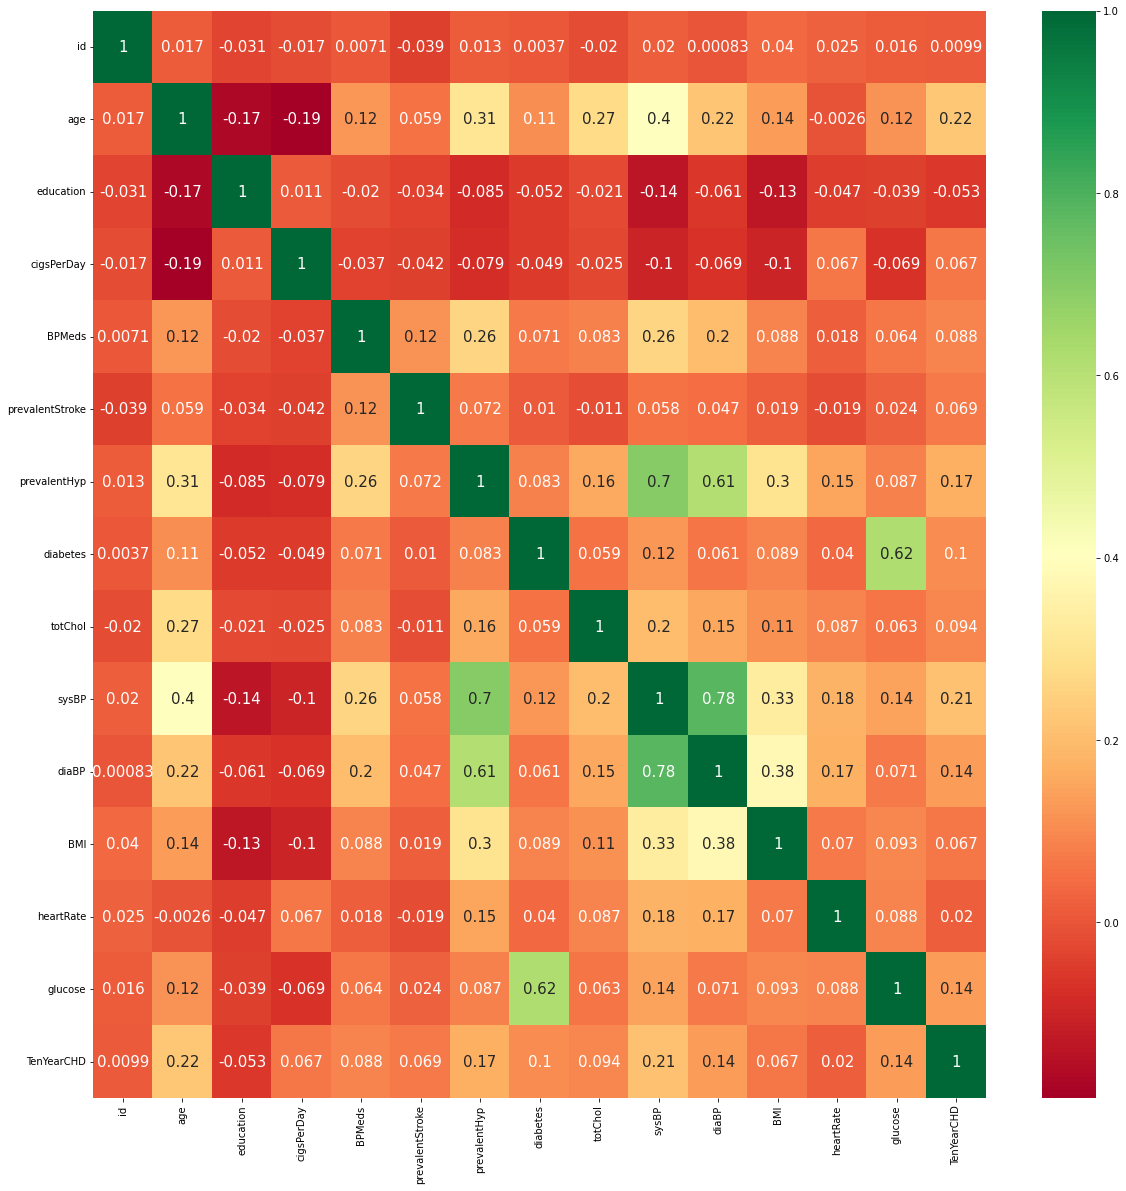

In [ ]:
corr_matrix = cardiovascular.corr()
top_corr_feature = corr_matrix.index
plt.figure(figsize=(20, 20))
sns.heatmap(cardiovascular[top_corr_feature].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

# Here, I observed that the EDUCATION attribute is not correlated with any other atttribute.

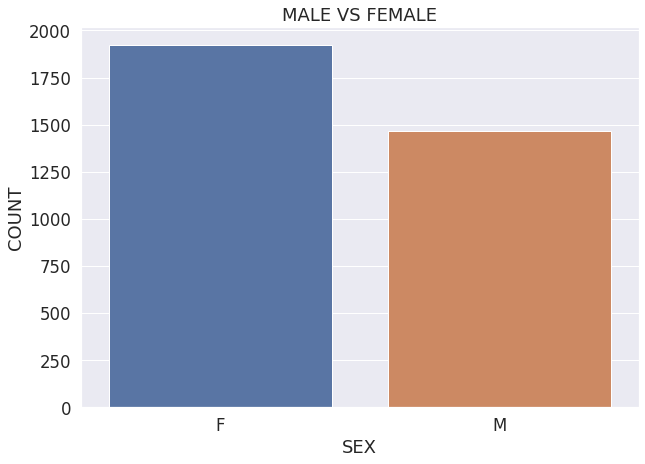

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x=cardiovascular['sex'])
plt.title('MALE VS FEMALE')
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.show()

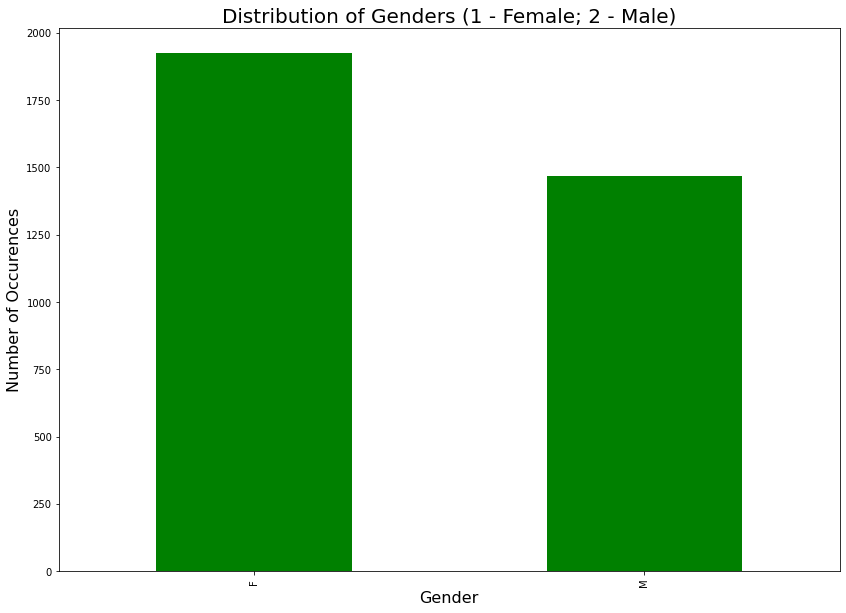

In [ ]:
# Gender Distribution
fig, ax = plt.subplots(figsize = (14, 10))
ax.set_title('Distribution of Genders (1 - Female; 2 - Male)', fontsize = 20)
ax.set_xlabel("Gender", fontsize = 16)
ax.set_ylabel("Number of Occurences", fontsize = 16)
cardiovascular["sex"].value_counts().plot(ax = ax, kind = "bar", color = "green")

# Now let see various visual representations of the data to understand more about relationship between various feautures.

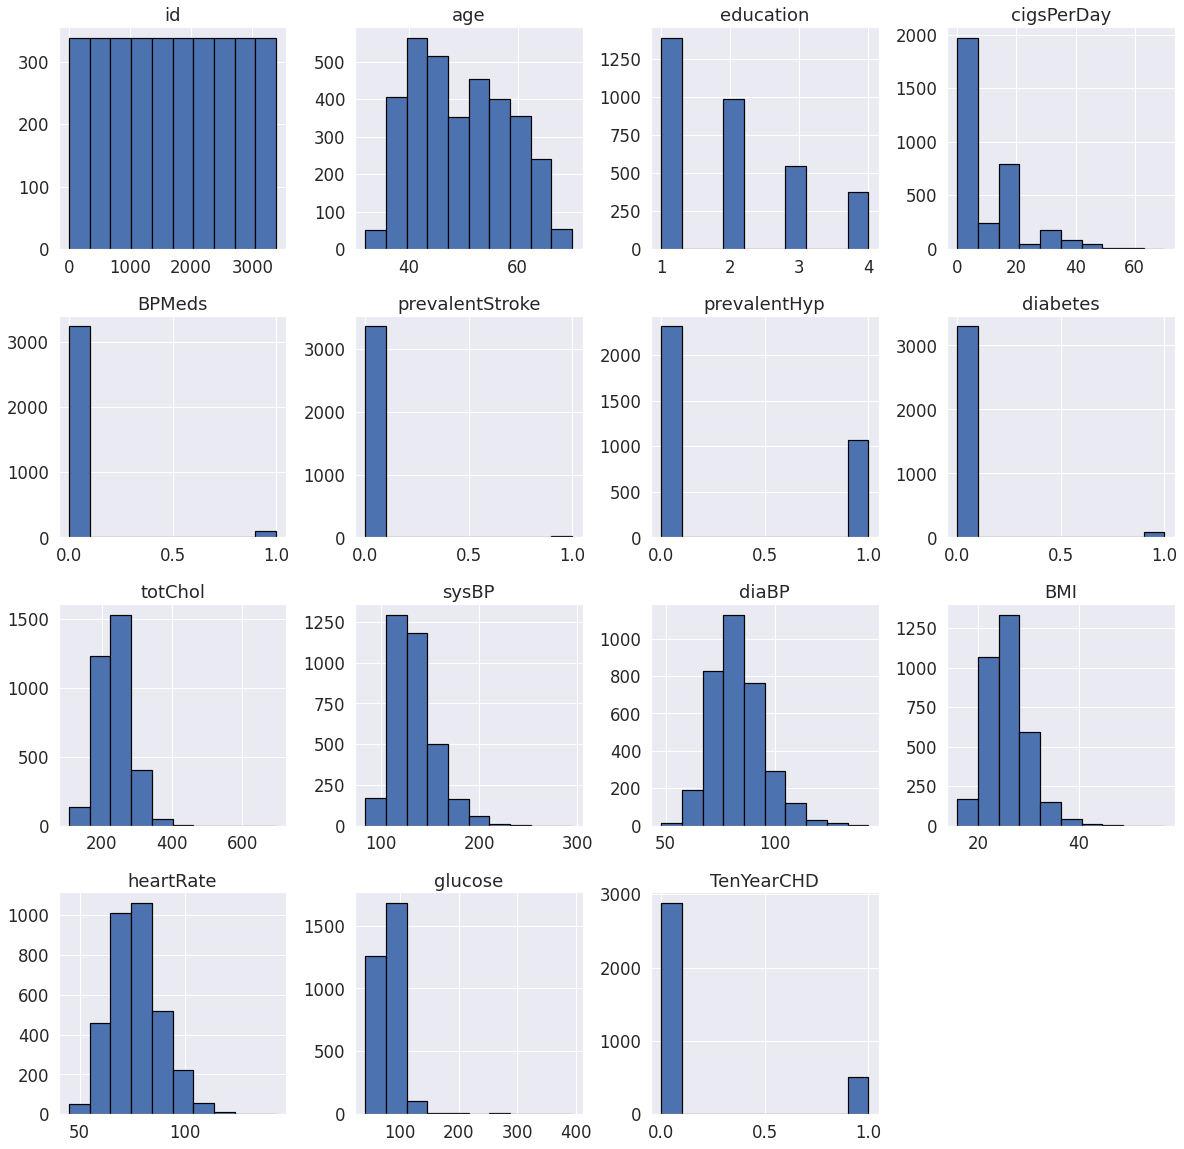

In [ ]:
sns.set(font_scale=1.5)
cardiovascular.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

# The most of the patients have a mean age of 50

In [ ]:
cardiovascular.age.mean()

49.54218289085546

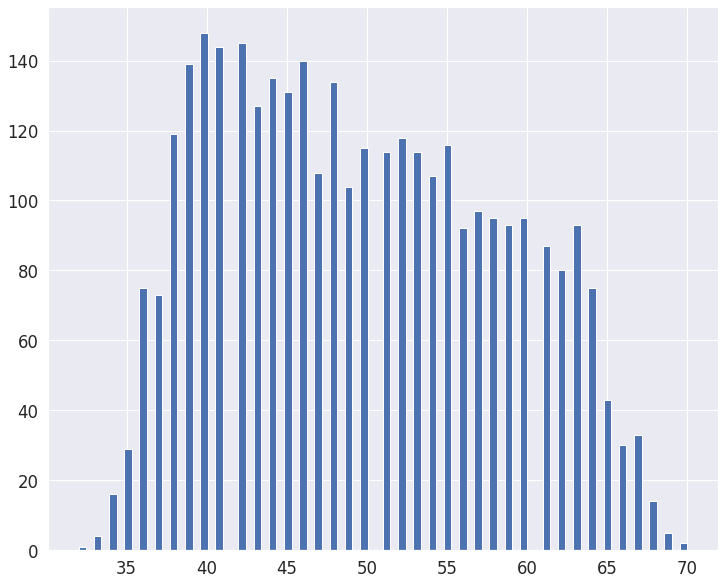

In [ ]:
plt.figure(figsize=(12, 10))
cardiovascular.age.hist(bins=80)

<Figure size 1440x1080 with 0 Axes>

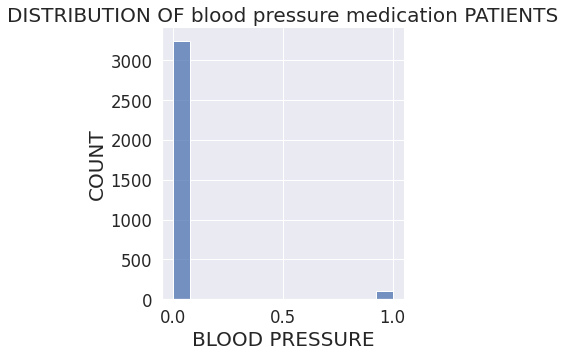

In [ ]:
plt.figure(figsize=(20,15))
sns.displot(cardiovascular["BPMeds"])
plt.title("DISTRIBUTION OF blood pressure medication PATIENTS",fontsize=20)
plt.xlabel("BLOOD PRESSURE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

In [ ]:
sysBP

#  Boxen plot of continuous features

---



Text(0, 0.5, '')

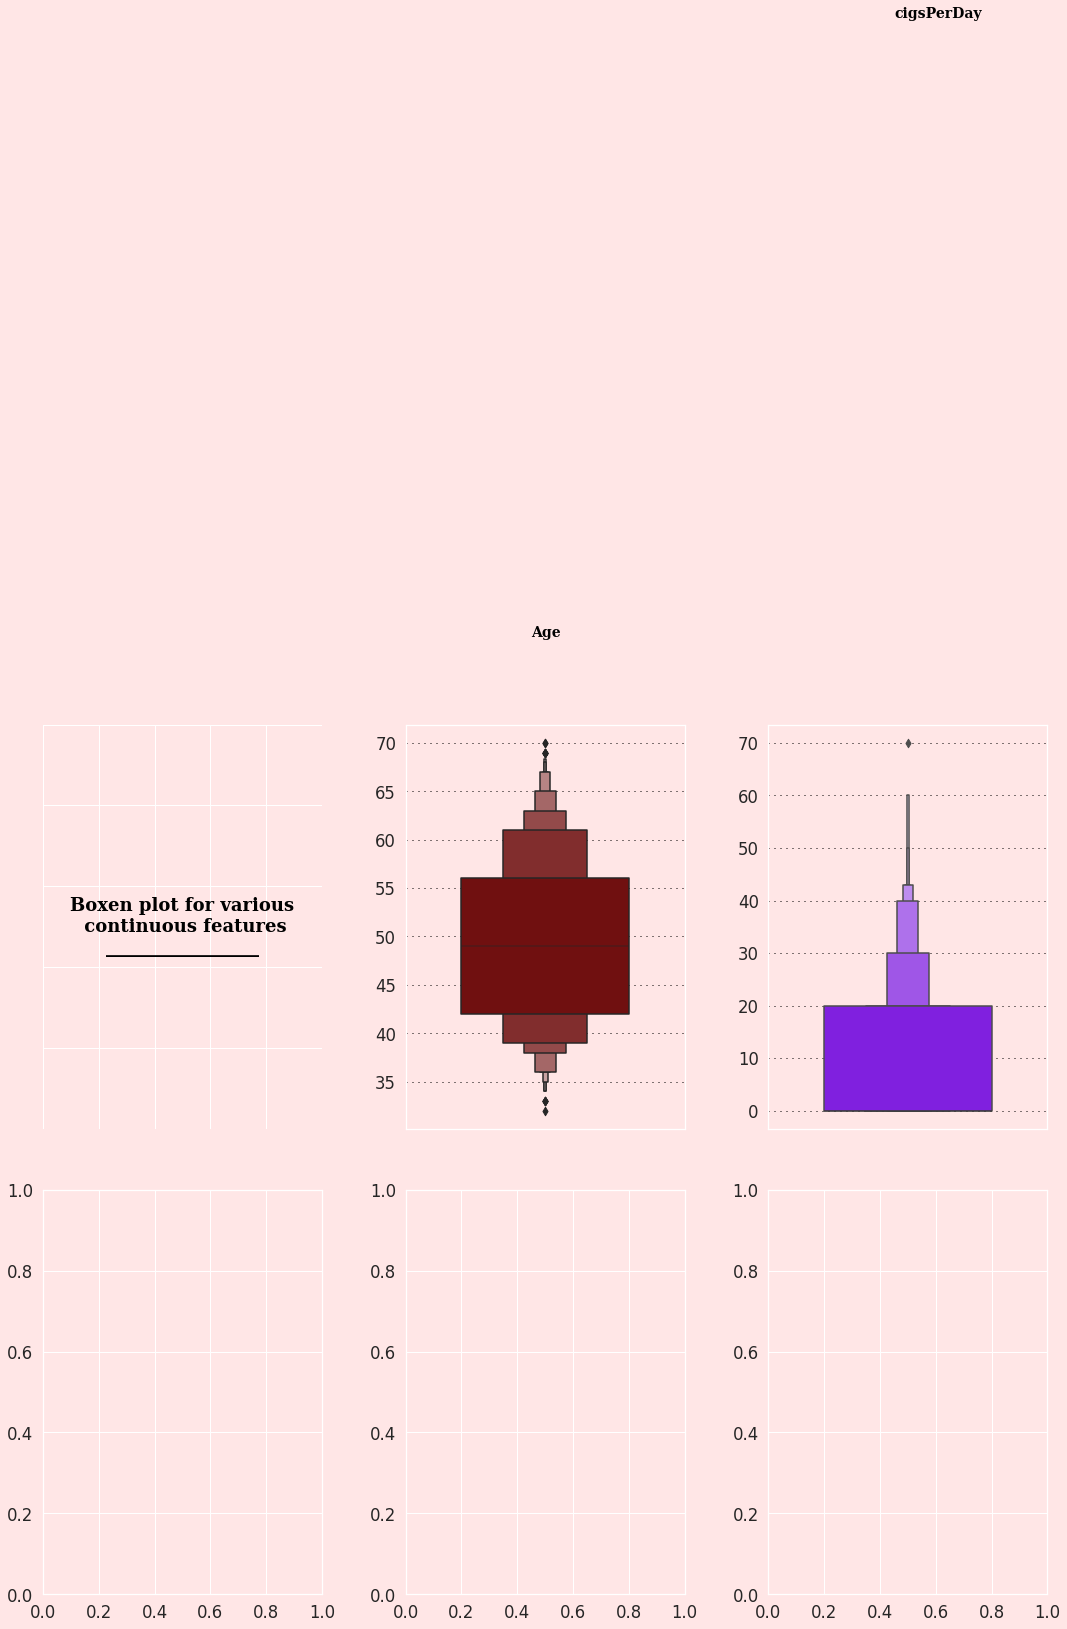

In [ ]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])


background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")


# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=cardiovascular['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# cigsPerDay 
ax2.text(-0.05, 208, 'cigsPerDay', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=cardiovascular['cigsPerDay'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

